# Linear Regression and Temperature

In this notebook, we'll look at using linear regression to study changes in temperature.

## Setup

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%config InlineBackend.figure_format ='retina'

## Getting our data

We'll be getting data from [North America Land Data Assimilation System (NLDAS)](https://wonder.cdc.gov/NASA-NLDAS.html), which provides the daily average temperature from 1979-2011 for the United States.

For the next step, you will need to choose some settings in the data request form. These are:

- GroupBy: Month Day, Year
- Your State
- Export Results (check box)
- Show Zero Values (check box)

>1) Download the data for your home state (or state of your choosing) and upload it to M2 in your work directory.

# Loading our data

In [4]:
df = pd.read_csv('North America Land Data Assimilation System (NLDAS) Daily Air Temperatures and Heat Index (1979-2011).txt',delimiter='\t',skipfooter=14,engine='python')

In [5]:
df

,Notes,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F)
0,NaN,"Jan 01, 1979",1979/01/01,35.12
1,NaN,"Jan 02, 1979",1979/01/02,38.61
2,NaN,"Jan 03, 1979",1979/01/03,48.14
3,NaN,"Jan 04, 1979",1979/01/04,51.78
4,NaN,"Jan 05, 1979",1979/01/05,48.34
...,...,...,...,...
12049,NaN,"Dec 28, 2011",2011/12/28,54.11
12050,NaN,"Dec 29, 2011",2011/12/29,58.51
12051,NaN,"Dec 30, 2011",2011/12/30,60.57
12052,NaN,"Dec 31, 2011",2011/12/31,59.16


### Clean the data

>2) Drop any rows that have the value "Total" in the Notes column, then drop the Notes column

In [6]:
df2 = df.drop(df[df["Notes"] =="Total"].index)
df2.drop('Notes', inplace=True, axis=1)

>3) Make a column called Date that is in the pandas datetime format

In [7]:
df2["Date"] = pd.to_datetime(df2["Month Day, Year Code"],errors='raise')

>4) Make columns for 'Year', 'Month', and 'Day' by splitting the column 'Month Day, Year'

In [8]:
df2[["Year","Month", "Day"]] = df2["Month Day, Year Code"].str.split("/", expand = True)
df2.head()

,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date,Year,Month,Day
0,"Jan 01, 1979",1979/01/01,35.12,1979-01-01,1979,01,01
1,"Jan 02, 1979",1979/01/02,38.61,1979-01-02,1979,01,02
2,"Jan 03, 1979",1979/01/03,48.14,1979-01-03,1979,01,03
3,"Jan 04, 1979",1979/01/04,51.78,1979-01-04,1979,01,04
4,"Jan 05, 1979",1979/01/05,48.34,1979-01-05,1979,01,05


In [9]:
df2['DateInt'] = df2['Date'].astype(int)/10e10 # This will be used later

## Generating a scatter plot

> 4) Use df.plot.scatter to plot 'Date' vs 'Avg Daily Max Air Temperature (F)'. You might want to add figsize=(50,5) as an argument to make it more clear what is happening.

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

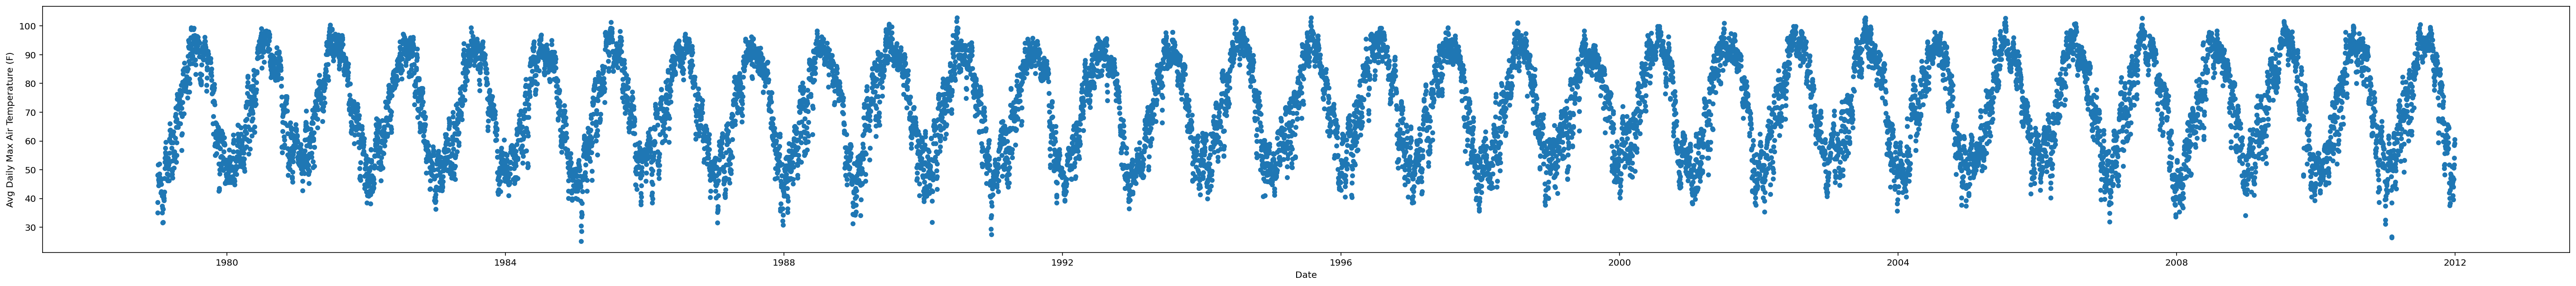

In [10]:
df2.plot.scatter(x ="Date", y="Avg Daily Max Air Temperature (F)", figsize=(50,5))

>5) Describe your plot.

This plot shows the Daily Average Temperature in Arizona from 1980 until 2012. The graph fluctuates up and down because of the summer vs. winter seasons and their average temperatures.

### Adding colors for our graph

In [11]:
# No need to edit this unless you want to try different colors or a pattern other than colors by month

cmap = matplotlib.cm.get_cmap("nipy_spectral", len(df2['Month'].unique())) # Builds a discrete color mapping using a built in matplotlib color map

c = []
for i in range(cmap.N): # Converts our discrete map into Hex Values
    rgba = cmap(i)
    c.append(matplotlib.colors.rgb2hex(rgba))

df2['color']=[c[int(i-1)] for i in df2['Month'].astype(int)] # Adds a column to our dataframe with the color we want for each row

>6) Make the same plot as 4) but add color by adding the argument c=df\['color'\] to our plotting command.

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

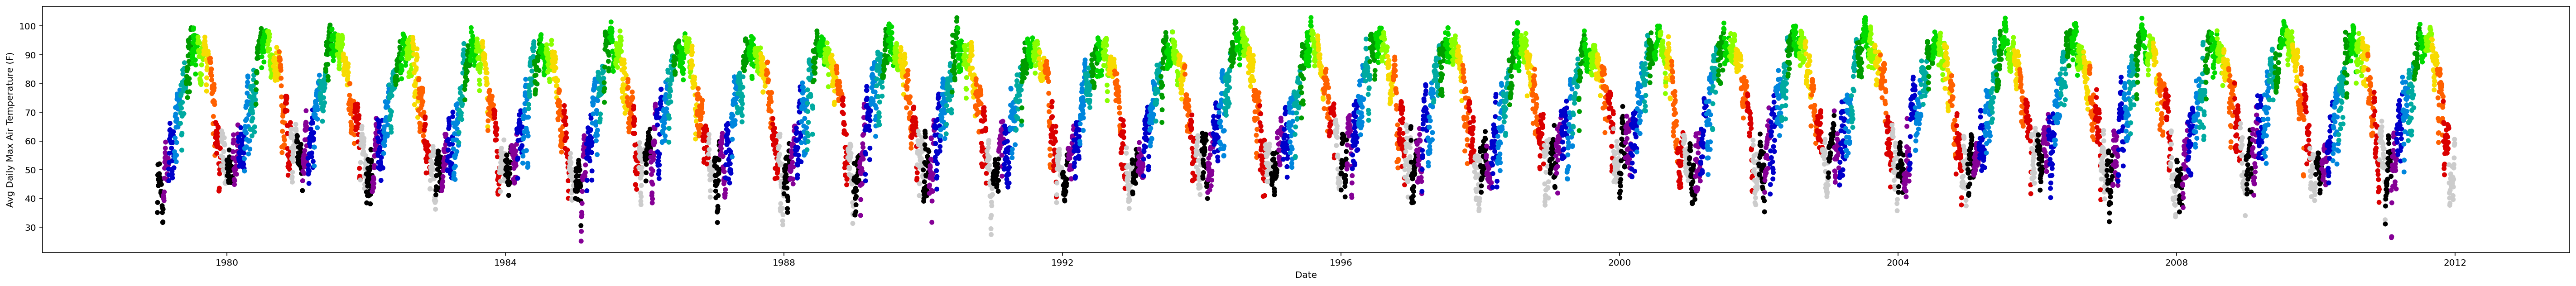

In [12]:
df2.plot.scatter(x ="Date", y="Avg Daily Max Air Temperature (F)", figsize=(50,5), c=df2['color'])

## Pick a subset of the data

>7) Select a 6 month period from the data. # Hint use logic and pd.datetime(YYYY, MM, DD)

In [21]:
df3 = df2[(df2['Date'] >= pd.datetime(1990, 1, 1))]
df3 = df3[(df3['Date'] <= pd.datetime(1990, 6, 1))]
df3

,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date,Year,Month,Day,DateInt,color
4018,"Jan 01, 1990",1990/01/01,49.93,1990-01-01,1990,01,01,6311520.0,#000000
4019,"Jan 02, 1990",1990/01/02,42.58,1990-01-02,1990,01,02,6312384.0,#000000
4020,"Jan 03, 1990",1990/01/03,39.06,1990-01-03,1990,01,03,6313248.0,#000000
4021,"Jan 04, 1990",1990/01/04,39.98,1990-01-04,1990,01,04,6314112.0,#000000
4022,"Jan 05, 1990",1990/01/05,41.38,1990-01-05,1990,01,05,6314976.0,#000000
...,...,...,...,...,...,...,...,...,...
4165,"May 28, 1990",1990/05/28,70.87,1990-05-28,1990,05,28,6438528.0,#00aaa1
4166,"May 29, 1990",1990/05/29,69.75,1990-05-29,1990,05,29,6439392.0,#00aaa1
4167,"May 30, 1990",1990/05/30,75.81,1990-05-30,1990,05,30,6440256.0,#00aaa1
4168,"May 31, 1990",1990/05/31,77.70,1990-05-31,1990,05,31,6441120.0,#00aaa1


>8) Plot the subset using the the same code you used in 6). You can change the figsize if needed.

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

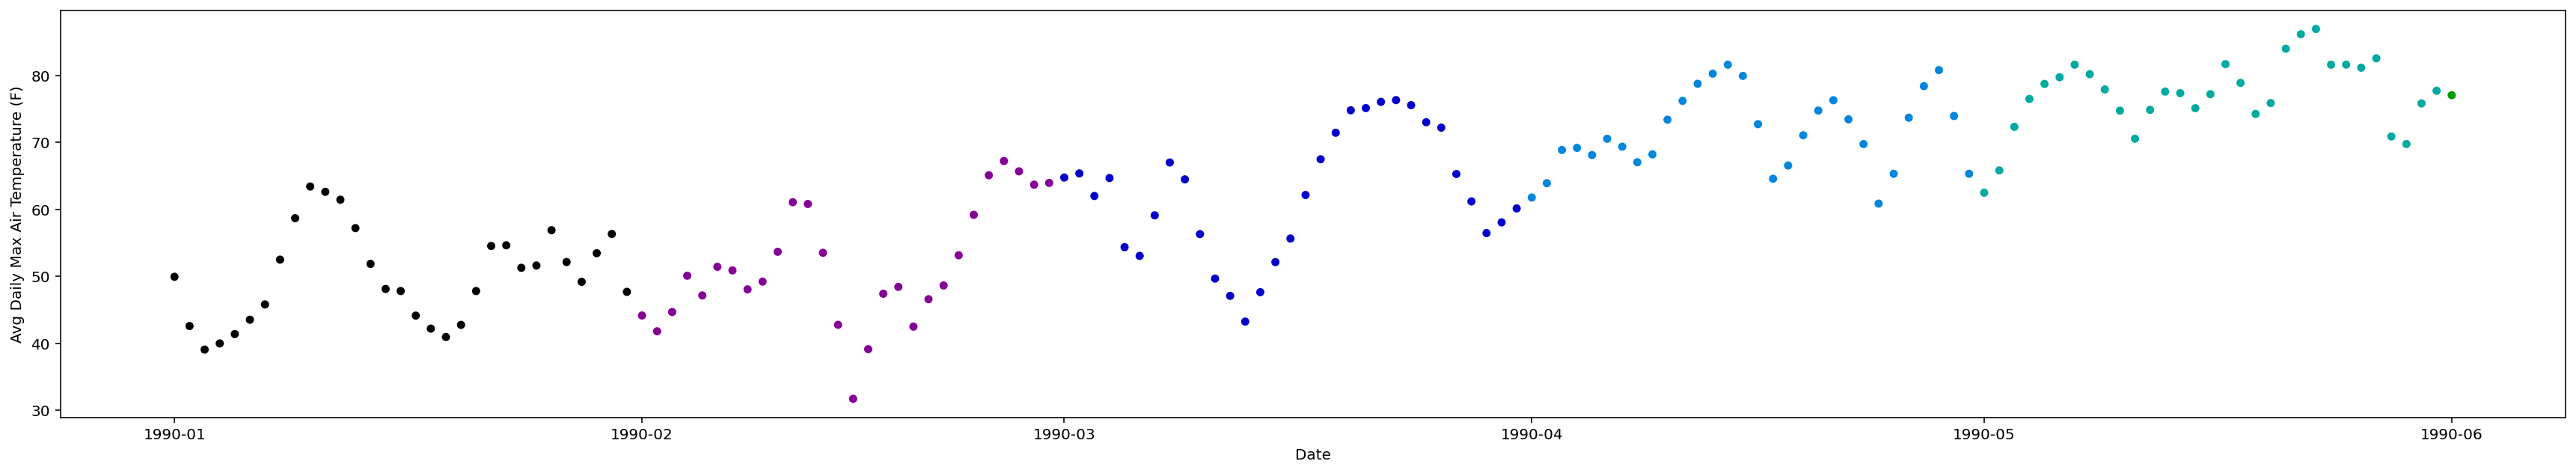

In [25]:
df3.plot.scatter(x ="Date", y="Avg Daily Max Air Temperature (F)", figsize=(30,5), c=df3['color'])

## Linear Regression

We are going to use a very [simple linear regression model](https://en.wikipedia.org/wiki/Simple_linear_regression). You may implement a more complex model if you wish.

The method described here is called the least squares method and is defined as:

$m = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}))}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$

$b = \bar{y} - m\bar{x}$

Where $\bar{x}$ and $\bar{y}$ are the average value of $x$ and $y$ respectively.

First we need to define our X and Y values.

In [27]:
X=df3['DateInt'].values
Y=df3['Avg Daily Max Air Temperature (F)'].values

In [35]:
def lin_reg(x,y):
    # Calculate the average x and y
    x_avg = np.mean(x)
    y_avg = np.mean(y)

    num = 0
    den = 0
    for i in range(len(x)): # This represents our sums
        num = num + (x[i] - x_avg)*(y[i] - y_avg) # Our numerator
        den = den + (x[i] - x_avg)**2 # Our denominator
    # Calculate slope
    m = num / den
    # Calculate intercept
    b = y_avg - m*x_avg

    print (m, b)
    
    # Calculate our predicted y values
    y_pred = m*x + b
    
    return y_pred

In [36]:
Y_pred = lin_reg(X,Y)

0.00028484074417691623 -1753.6176666905865


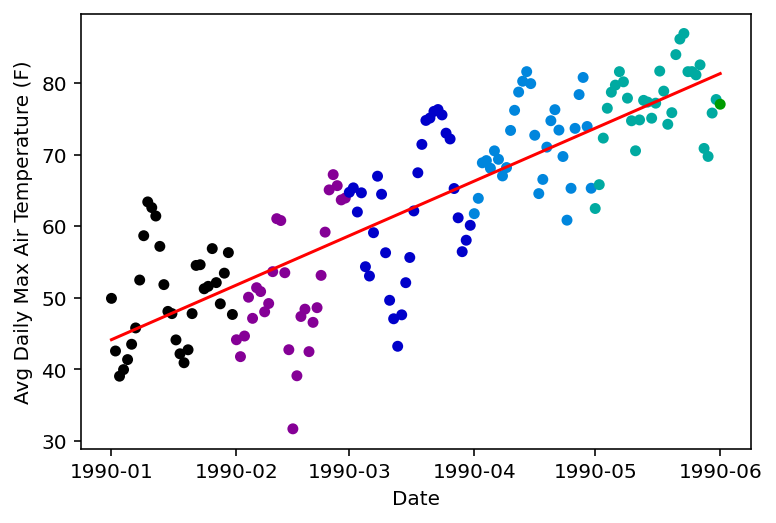

In [32]:
df3.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)',c=df3['color'])
plt.plot([min(df3['Date'].values), max(df3['Date'].values)], [min(Y_pred), max(Y_pred)], color='red') # best fit line
plt.show()

>9) What are the slope and intercept of your best fit line?

The slope is 0.00028484 and the intercept is -1753.6176666905865.

>10) What are the minimum and maximum Y values of your best fit line? Is your slope positive or negative?

The minimum value is 44.16 and the max value is 81.32. The slope of this line is positive.

## Putting it all together

>11) Generate a best fit line for the full data set and plot the line over top of the data.

In [37]:
X2=df2['DateInt'].values
Y2=df2['Avg Daily Max Air Temperature (F)'].values

pred = lin_reg(X2,Y2)

2.4785972018418577e-07 69.5934738997457


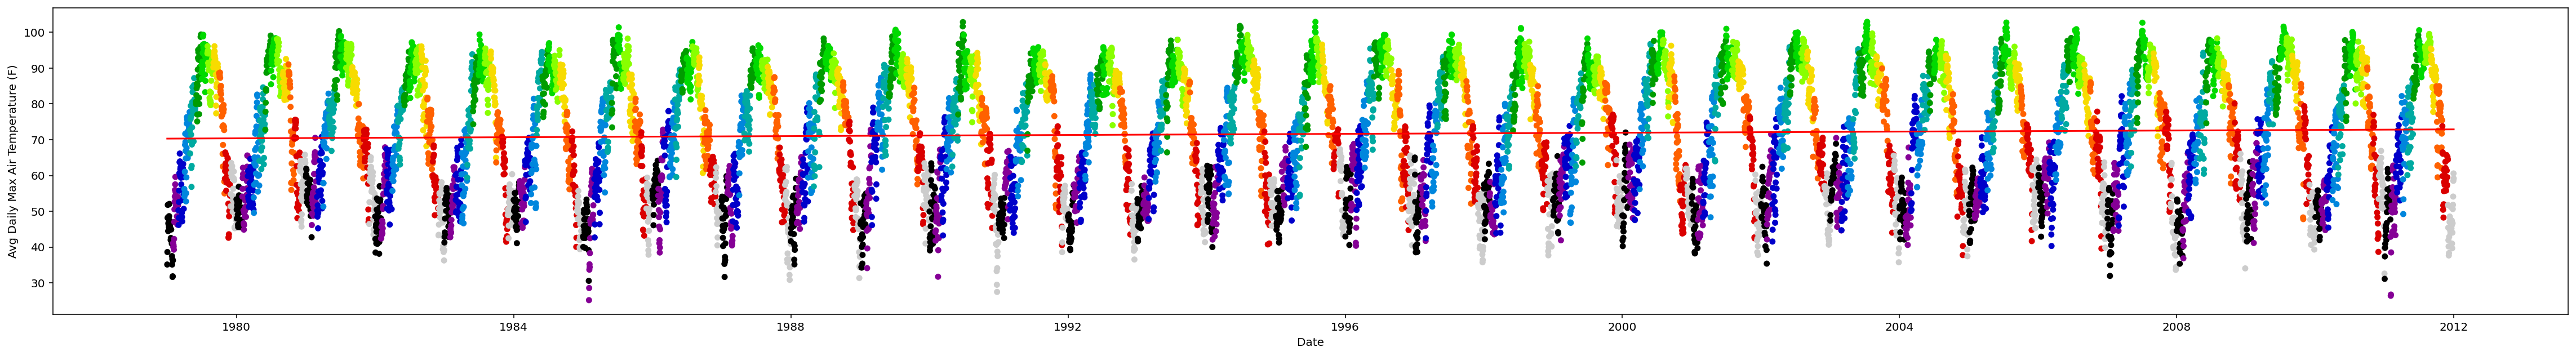

In [40]:
df2.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)', figsize=(40,5), c=df2['color'])
plt.plot([min(df2['Date'].values), max(df2['Date'].values)], [min(pred), max(pred)], color='red') # best fit line
plt.show()

>12) Is the slope positive or negative? What do you think that means?

The slope of this best fit line is positive, meaning that over time the Daily Average Temperature is slowly increasing.